In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("DFsalary2024.csv")
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M


## Ishchilarning soni yillar kesimida o'sishi ?

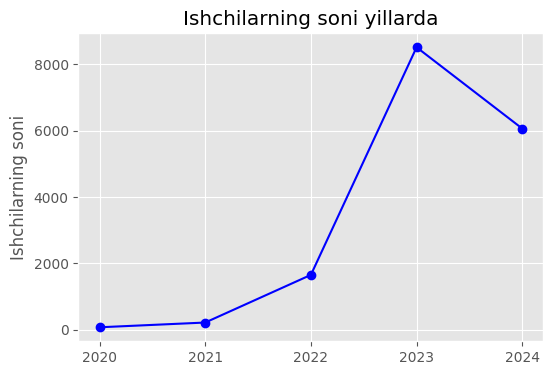

In [3]:
number_workers = df.groupby("work_year")["salary_in_usd"].size()
plt.style.use("ggplot")
fig, ax = plt.subplots()
fig.set_size_inches([6,4])
ax.plot(number_workers.index, number_workers.values, marker="o", color="blue")
ax.set(xticks=np.arange(2020, 2025))
ax.set_ylabel("Ishchilarning soni")
ax.set_title("Ishchilarning soni yillarda")
plt.show()

### Mana ko'rishimiz mumkin ishchlarning soni 2022 hamda 2023 yillar orasida juda katta o'sish bo'lgan va 2024 yilga kelib 8200 dan 6000ga tushgan.

## Kompaniyadagi ishchilarning yillik ish haqqi 

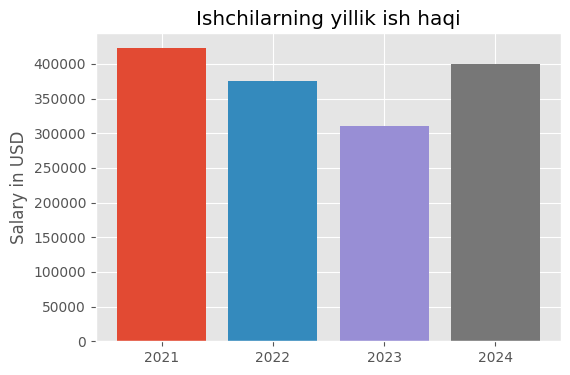

In [4]:
year2024 = df[df["work_year"]==2024][:218]
year2023 = df[df["work_year"]==2023][:218]
year2022 = df[df["work_year"]==2022][:218]
year2021 = df[df["work_year"]==2021][:218]
plt.style.use("ggplot")
fig, ax = plt.subplots()
fig.set_size_inches([6,4])
ax.bar(year2021["work_year"], year2021["salary_in_usd"])
ax.bar(year2022["work_year"], year2022["salary_in_usd"])
ax.bar(year2023["work_year"], year2023["salary_in_usd"])
ax.bar(year2024["work_year"], year2024["salary_in_usd"])
ax.set(xticks=np.arange(2021, 2025))
plt.ylabel("Salary in USD")
plt.title("Ishchilarning yillik ish haqi")
plt.show()

### Ish haqqi umumiy qo'shilganda 2021 yilda ularga ko'proq salary berilgan boshqa yillarga qaraganda bu yerda 218ta ishchi bo'yicha olingan.

## Eng ko'p yillik ish haqqi oladigan kasblar bo'yicha ?

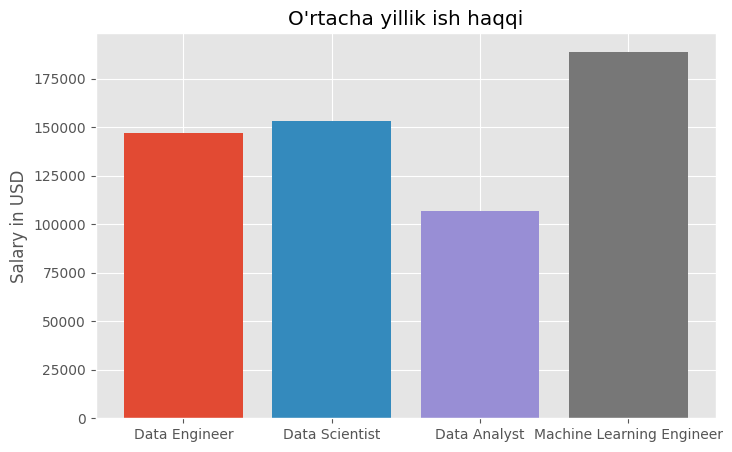

In [5]:
new_df = df.groupby("job_title")["salary_in_usd"].size().sort_values(ascending=False)[:4]
data_engineer= df[df["job_title"]=="Data Engineer"][:1700]["salary_in_usd"].mean()
data_scientist=df[df["job_title"]=="Data Scientist"][:1700]["salary_in_usd"].mean()
data_analyst=df[df["job_title"]=="Data Analyst"][:1700]["salary_in_usd"].mean()
machine_learning=df[df["job_title"]=="Machine Learning Engineer"][:1700]["salary_in_usd"].mean()
plt.style.use("ggplot")
fig, ax = plt.subplots()
fig.set_size_inches([8,5])
ax.bar(new_df.index[0], data_engineer)
ax.bar(new_df.index[1], data_scientist)
ax.bar(new_df.index[2], data_analyst)
ax.bar(new_df.index[3], machine_learning)
ax.set_title("O'rtacha yillik ish haqqi")
ax.set_ylabel("Salary in USD")
plt.show()

### ML Engineerda ishlaydiganlar qolganlarga qaraganda sezilarli darajada ko'proq salary olishadi ular yiliga 200ming $ ga yaqin maosh olishadi.

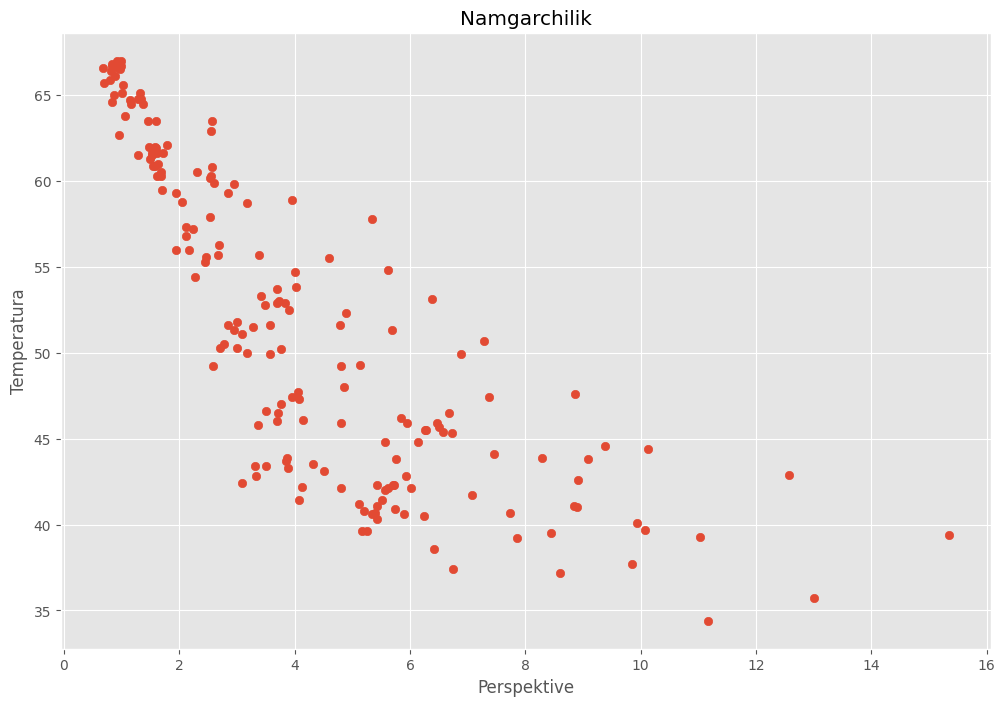

In [7]:
seattle_weather=pd.read_csv("/Users/macbookair/Desktop/Project/seattle_weather.csv")
fig, ax = plt.subplots()
ax.scatter(x=seattle_weather["MLY-PRCP-NORMAL"], y=seattle_weather["MLY-TAVG-NORMAL"])
plt.title("Namgarchilik")
ax.set_xlabel("Perspektive")
ax.set_ylabel("Temperatura")
fig.set_size_inches([12,8])

plt.show()

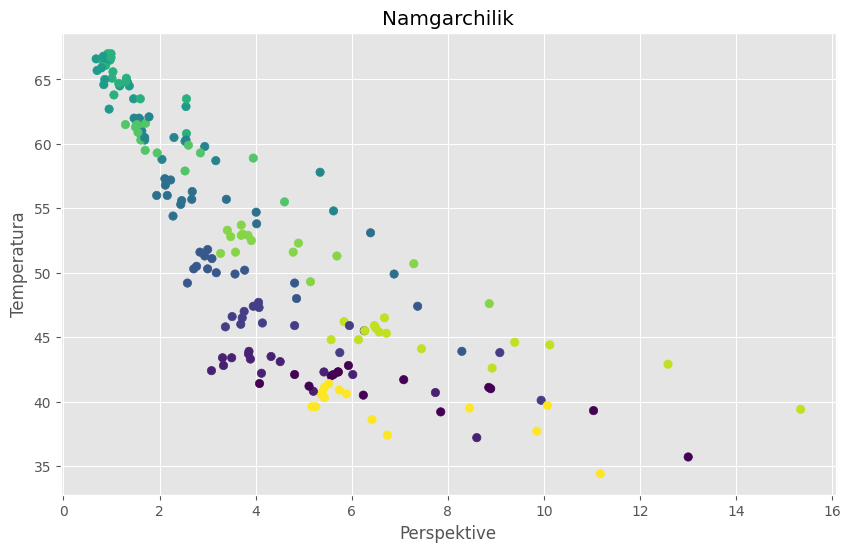

In [8]:
fig, ax = plt.subplots()
ax.scatter(x=seattle_weather["MLY-PRCP-NORMAL"], y=seattle_weather["MLY-TAVG-NORMAL"], c=seattle_weather["DATE"])
plt.title("Namgarchilik")
ax.set_xlabel("Perspektive")
ax.set_ylabel("Temperatura")
fig.set_size_inches([10,6])

plt.show()

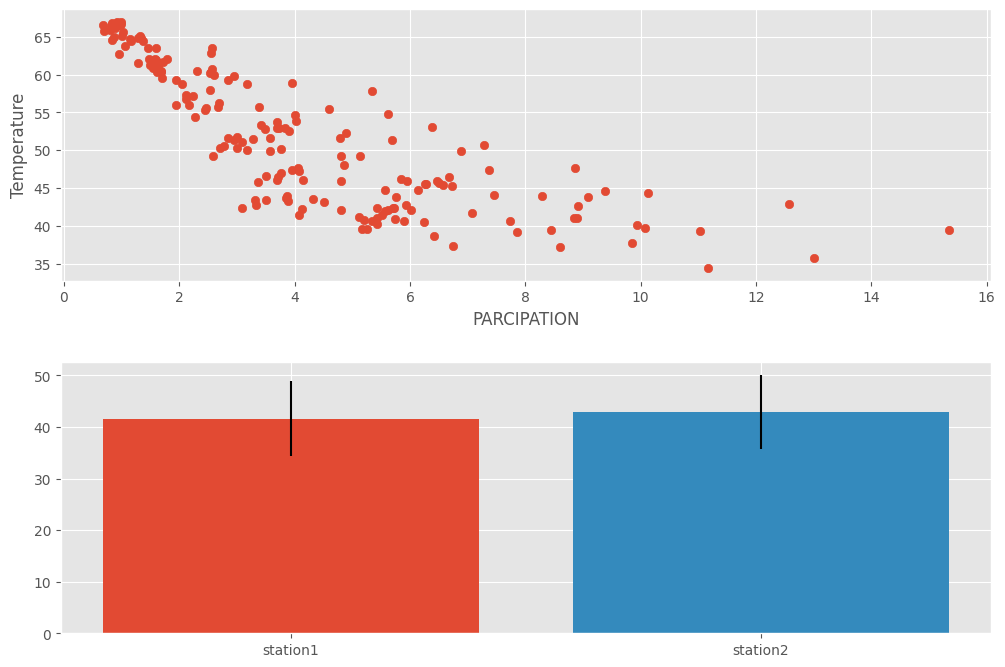

In [9]:
station1 = seattle_weather[seattle_weather["STATION"]=="USC00456295"]["MLY-TMIN-NORMAL"].mean()
station2 = seattle_weather[seattle_weather["STATION"]=="USC00457773"]["MLY-TMIN-NORMAL"].mean()
std1 = seattle_weather[seattle_weather["STATION"]=="USC00456295"]["MLY-TMIN-NORMAL"].std()
std2 = seattle_weather[seattle_weather["STATION"]=="USC00457773"]["MLY-TMIN-NORMAL"].std()
fig, ax = plt.subplots(2,1)
plt.style.use("grayscale")
ax[0].scatter(seattle_weather["MLY-PRCP-NORMAL"], seattle_weather["MLY-TAVG-NORMAL"])
ax[0].set_ylabel("Temperature")
ax[0].set_xlabel("PARCIPATION")
ax[1].bar("station1", station1, yerr=std1)
ax[1].bar("station2", station2, yerr=std2)
fig.set_size_inches([12,8])
plt.subplots_adjust(hspace=0.3, bottom=0.10)
plt.show()

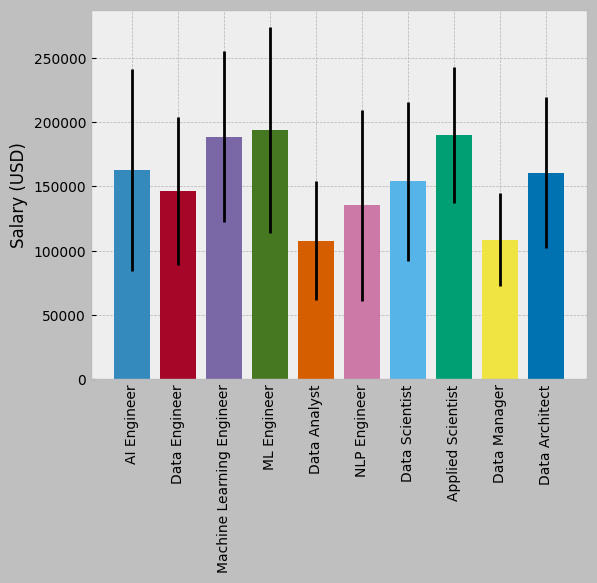

In [10]:
plt.style.use("bmh")
jobs = df["job_title"].unique()[:10]
fig, ax = plt.subplots()
for job in jobs:
  jobs_df = df[df["job_title"] == job]
  ax.bar(job, jobs_df["salary_in_usd"].mean(),
         yerr=jobs_df["salary_in_usd"].std())
ax.set_ylabel("Salary (USD)")
plt.xticks(rotation=90)
plt.show()
